## TPC-DS BigQuery Import  
Import data from GCS to a previously created BigQuery dataset

In [1]:
import config, schema, bq, load

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.set_option("display.max_rows", 1000)

## 00. Qualification 1GB

### 00.A Create Dataset for Upload

In [4]:
dataset_name = 'ds_1GB_qual'

In [5]:
bq.create_dataset(dataset_name=dataset_name)

Dataset(DatasetReference('tpc-benchmarking-9432', 'ds_1GB_qual'))

### 00.B Create BigQuery Schema to Upload To

In [6]:
schema_name = "bq_ds_0"

In [7]:
bq.create_schema(schema_file=config.fp_schema + config.sep + schema_name + ".ddl",
                 dataset=dataset_name)

In [8]:
# set n to about 5, high numbers run afoul of BQ's upload limits
# i.e. 403 - rateLimitExceeded
# https://cloud.google.com/bigquery/docs/error-messages
u = load.BQPooledUpload(dataset_name=dataset_name,
                        test="ds", scale=1, n=5)


### 00.C Upload from GCS to BigQuery

In [9]:
# Setting this to True will print out status during parallel pipeline loading
u.verbose = False

In [10]:
results = u.pipeline()

In [11]:
a = list(results)
a

[None, None, None, None, None]

In [12]:
dfx = pd.concat(u.up_data)
dfx.sort_index(inplace=True)

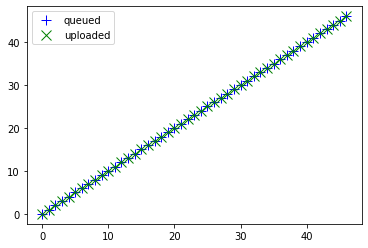

In [13]:
plt.plot(u.df.index, '+',
         markersize=10, 
         markerfacecolor=None,
         markeredgecolor='blue', label="queued");
plt.plot(dfx.index, 'x',
         markersize=10, 
         markerfacecolor=None,
         markeredgecolor='green', label="uploaded");
plt.legend();

In [14]:
dfx.head()

,chunk_name,url,size_bytes,uri,test,scale,table,n,t0,t1,done,file_n,dt,dt_s,size_megabytes,size_gigabytes,MB/s,GB/s
0,ds_1GB_call_center_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,1885,gs://tpc-benchmark-5947/ds_1GB_call_center_1_1...,ds,1GB,call_center,1,2020-04-19 22:20:19.215834,2020-04-19 22:20:22.838354,True,0,00:00:03.622520,3.622520,0.001798,0.000002,0.000496,5.203560e-07
1,ds_1GB_catalog_page_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,1620074,gs://tpc-benchmark-5947/ds_1GB_catalog_page_1_...,ds,1GB,catalog_page,1,2020-04-19 22:20:22.839672,2020-04-19 22:20:25.331656,True,1,00:00:02.491984,2.491984,1.545023,0.001620,0.619997,6.501141e-04
2,ds_1GB_catalog_returns_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,21234304,gs://tpc-benchmark-5947/ds_1GB_catalog_returns...,ds,1GB,catalog_returns,1,2020-04-19 22:20:25.332898,2020-04-19 22:20:35.727194,True,2,00:00:10.394296,10.394296,20.250610,0.021234,1.948243,2.042880e-03
3,ds_1GB_catalog_sales_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,294468836,gs://tpc-benchmark-5947/ds_1GB_catalog_sales_1...,ds,1GB,catalog_sales,1,2020-04-19 22:20:35.728456,2020-04-19 22:21:34.683379,True,3,00:00:58.954923,58.954923,280.827366,0.294469,4.763425,4.994813e-03
4,ds_1GB_customer_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,13109372,gs://tpc-benchmark-5947/ds_1GB_customer_1_12.dat,ds,1GB,customer,1,2020-04-19 22:21:34.684728,2020-04-19 22:21:41.773799,True,4,00:00:07.089071,7.089071,12.502071,0.013109,1.763570,1.849237e-03
